In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions, get_distributions
df= pd.read_csv('train.csv')
df


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Отримаємо кількість незаповнених даних по стовпчиках

In [2]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Видалимо стовбчики PassengerId  та Unnamed: 0 які дублюють index,

In [3]:
df = df.drop(['PassengerId','Unnamed: 0'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Побудуємо гістограму розподілу віку пасажирів

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

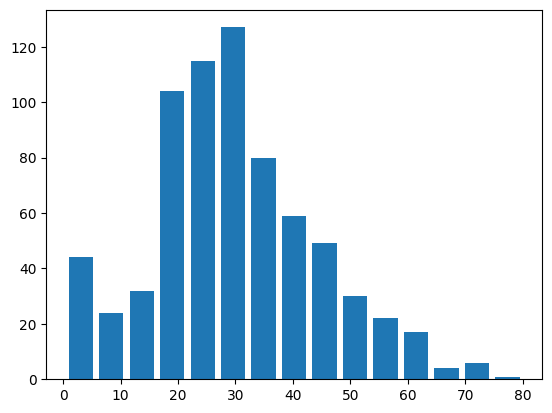

In [4]:
plt.hist(df['Age'], 15, rwidth =0.8)

### У колонці  Age відсутні 177 значень. Для заповнення таблиці даними зробимо наступні припущення.
У колонці Name ми бачимо чотири категорії пасажирів Mr., Mrs., Miss. та other. У категорію Miss. потрапляють молоді незаміжні  жінки, відповідно, треба заповнити недостаючі дані у цій категорії середнім віком всіх Miss., вік яких ми знаємо. Аналогічно вчинемо із категоріями Mr.,  Mrs. та Other. 


### Розрахуємо кількість людей у кожній категорії

In [5]:
Quantity_Miss_full=0
Quantity_Mrs_full=0
Quantity_Mr_full=0
Quantity_Other_full=0
for i in range(891):
    if 'Miss.'in df['Name'][i]:
        Quantity_Miss_full+=1
    elif  'Mrs.' in df['Name'][i] :
        Quantity_Mrs_full+=1
    elif  'Mr.' in df['Name'][i] :
        Quantity_Mr_full+=1   
    else :
        Quantity_Other_full+=1
        
print('Загальна кількість Miss = {} '.format(Quantity_Miss_full))
print('Загальна кількість Mrs  = {} '.format(Quantity_Mrs_full))
print('Загальна кількість Mr   = {} '.format(Quantity_Mr_full))
print('Загальна кількість Other   = {} '.format(Quantity_Other_full)) 
print('SUM= ',Quantity_Miss_full+Quantity_Mrs_full+Quantity_Mr_full+Quantity_Other_full)
        

Загальна кількість Miss = 182 
Загальна кількість Mrs  = 125 
Загальна кількість Mr   = 517 
Загальна кількість Other   = 67 
SUM=  891


### Визначимо кількість пропущених записів по категоріях

In [6]:
Quantity_Miss=0
Quantity_Mrs=0
Quantity_Mr=0
Quantity_Other=0

for i in range(891):
    if 'Miss.' in df['Name'][i] and not df['Age'][i]>0:
        Quantity_Miss+=1
    elif 'Mrs.' in df['Name'][i] and not  df['Age'][i]>0:
        Quantity_Mrs+=1
    elif 'Mr.' in df['Name'][i] and not df['Age'][i]>0:
        Quantity_Mr+=1
    elif (not ('Miss.' in df['Name'][i] or 'Mrs.' in df['Name'][i] or 'Mr.' in df['Name'][i])) and not df['Age'][i]>0:
        Quantity_Other+=1
    
print('Пропущена кількість Miss  = {}   вісоток до загальної кількості {:.2f} '.format(Quantity_Miss, Quantity_Miss/Quantity_Miss_full))
print('Пропущена кількість Mrs   = {}   вісоток до загальної кількості {:.2f} '.format(Quantity_Mrs, Quantity_Mrs/Quantity_Mrs_full))
print('Пропущена кількість Mr    = {}   вісоток до загальної кількості {:.2f} '.format(Quantity_Mr, Quantity_Mr/Quantity_Mr_full))
print('Пропущена кількість Other = {}   вісоток до загальної кількості {:.2f}'.format(Quantity_Other, Quantity_Other/Quantity_Other_full)) 
print('SUM= ',Quantity_Miss+Quantity_Mrs+Quantity_Mr+Quantity_Other)   


Пропущена кількість Miss  = 36   вісоток до загальної кількості 0.20 
Пропущена кількість Mrs   = 17   вісоток до загальної кількості 0.14 
Пропущена кількість Mr    = 119   вісоток до загальної кількості 0.23 
Пропущена кількість Other = 5   вісоток до загальної кількості 0.07
SUM=  177


### Визначимо середній вік у кожній категорії

In [18]:
Avarage_Miss=0
Avarage_Mrs=0
Avarage_Mr=0
Avarage_Other=0
Q_Miss=0
Q_Mrs=0
Q_Mr=0
Q_Other=0

for i in range(891):
    if 'Miss.' in df['Name'][i] and  df['Age'][i]>0:
        Q_Miss+=1
        Avarage_Miss+=df['Age'][i]
    elif 'Mrs.' in df['Name'][i] and  df['Age'][i]>0:
        Q_Mrs+=1
        Avarage_Mrs+=df['Age'][i]
    elif 'Mr.' in df['Name'][i] and  df['Age'][i]>0:
        Q_Mr+=1
        Avarage_Mr+=df['Age'][i]
    elif (not ('Miss.' in df['Name'][i] or 'Mrs.' in df['Name'][i] or 'Mr.' in df['Name'][i])) and  df['Age'][i]>0:
        Q_Other+=1
        Avarage_Other+=df['Age'][i]
        
Avarage_Miss=round(Avarage_Miss/Q_Miss)
Avarage_Mrs=round(Avarage_Mrs/Q_Mrs)
Avarage_Mr=round(Avarage_Mr/Q_Mr)
Avarage_Other=round(Avarage_Other/Q_Other)  

print('Avarage_Miss_age  = {} (Miss={}) '.format( Avarage_Miss, Q_Miss))
print('Avarage_Mrs_age   = {} (Mrs={})'.format( Avarage_Mrs, Q_Mrs))
print('Avarage_M_age     = {} (Mr={})'.format( Avarage_Mr, Q_Mr))
print('Avarage_Other_age = {} (Other={})'.format( Avarage_Other, Q_Other))


Avarage_Miss_age  = 22 (Miss=146) 
Avarage_Mrs_age   = 36 (Mrs=108)
Avarage_M_age     = 32 (Mr=398)
Avarage_Other_age = 20 (Other=62)


### Створимо дві копії датафрейму для різного заповнення даними

In [33]:
df_norm=df.copy()
df_avarage=df.copy()


### Заповнюємо пусті поля  вибірки df_avarage  відповідними середніми значеннями

In [34]:
for i in range(891):
    if 'Miss.' in df_avarage['Name'][i] and not df_avarage['Age'][i]>0:
        df_avarage['Age'][i]=Avarage_Miss
    if 'Mrs.' in df_avarage['Name'][i] and  not df_avarage['Age'][i]>0:
        df_avarage['Age'][i]=Avarage_Mrs
    if 'Mr.' in df_avarage['Name'][i] and  not df_avarage['Age'][i]>0:
        df_avarage['Age'][i]=Avarage_Mr
    if not ('Miss.' in df_avarage['Name'][i] or 'Mrs.' in df_avarage['Name'][i] or 'Mr.' in df_avarage['Name'][i]) and not (df_avarage['Age'][i]>0): 
        df_avarage['Age'][i]=Avarage_Other
df_avarage      

C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\78629928.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avarage['Age'][i]=Avarage_Mr
C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\78629928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avarage['Age'][i]=Avarage_Mrs
C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\78629928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avarage['Age'][i]=Avarage_Mis

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Заповнюємо пусті поля у вибірці df_norm випадковими величинами, які формуються як нормальний розподіл від середнього віку відповідної категорії та стандартним відхиленням у розмірі 25 відсотків від середнього віку осіб

In [35]:
for i in range(891):
    if 'Miss.' in df_norm['Name'][i] and not df_norm['Age'][i]>0:
        x=np.random.normal(loc=Avarage_Miss, scale=Avarage_Miss/4)
        df_norm['Age'][i]=round(x)
        
    if 'Mrs.' in df_norm['Name'][i] and  not df_norm['Age'][i]>0:
        x=np.random.normal(loc=Avarage_Mrs, scale=Avarage_Mrs/4)
        df_norm['Age'][i]=round(x)
        
    if 'Mr.' in df_norm['Name'][i] and  not df_norm['Age'][i]>0:
        x=np.random.normal(loc=Avarage_Mr, scale=Avarage_Mr/4)
        df_norm['Age'][i]=round(x)
        
    if not ('Miss.' in df_norm['Name'][i] or 'Mrs.' in df_norm['Name'][i] or 'Mr.' in df_norm['Name'][i]) and not (df_norm['Age'][i]>0): 
        x=np.random.normal(loc=Avarage_Other, scale=Avarage_Other/4)
        df_norm['Age'][i]=round(x)
        
        
df_norm      

C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\2362897163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['Age'][i]=round(x)
C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\2362897163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['Age'][i]=round(x)
C:\Users\Александр\AppData\Local\Temp\ipykernel_9916\2362897163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['Age'][i]=round(x)
C:\Users\

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,15.0,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Побудуємо порівняльні діагарми трьох розподілів

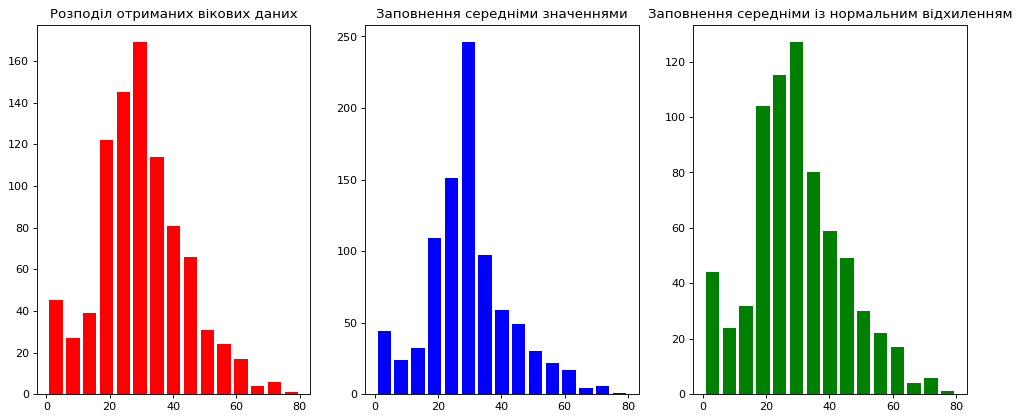

In [36]:
fig = plt.subplots(ncols=3, nrows=1, figsize=(15,6), dpi=80)
sp = plt.subplot(131)
plt.title('Розподіл отриманих вікових даних')
plt.hist(df_norm['Age'], 15, rwidth =0.8, color='red')
sp = plt.subplot(132)
plt.title('Заповнення середніми значеннями')
plt.hist(df_avarage['Age'], 15, rwidth =0.8, color='blue')
sp = plt.subplot(133)
plt.title('Заповнення середніми із нормальним відхиленням')
plt.hist(df['Age'], 15, rwidth =0.8,color='green')
plt.show()



Text(0.5, 1.0, 'Порівняльна діаграмма в єдиному маштабі')

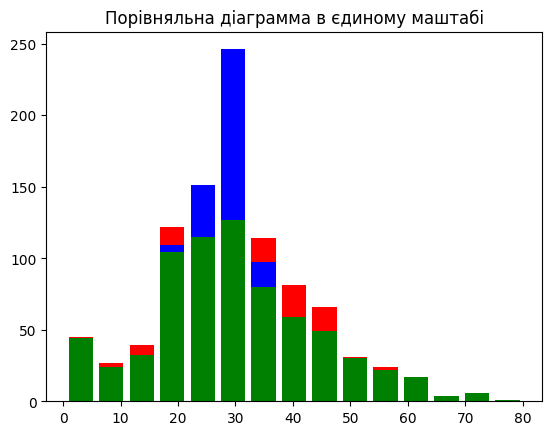

In [37]:
plt.hist(df_norm['Age'], 15, rwidth =0.8, color='red')
plt.hist(df_avarage['Age'], 15, rwidth =0.8, color='blue')
plt.hist(df['Age'], 15, rwidth =0.8,color='green')
plt.title('Порівняльна діаграмма в єдиному маштабі')

### Перевіремо розподіли двох варіантів заповнення даних на відповідність номальному

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.82s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.039982,1070.871095,-8906.812463,inf,0.112602,2.693919e-10


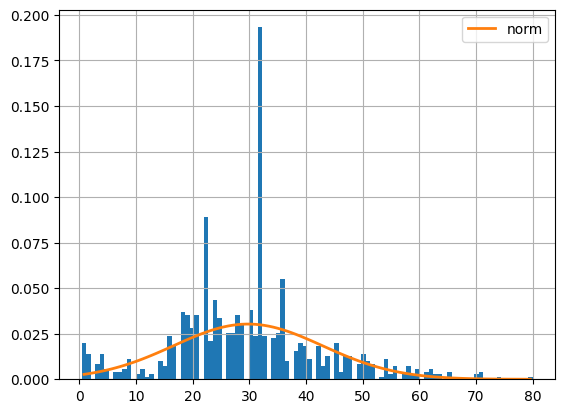

In [43]:
f_avarage = Fitter(df_avarage["Age"], distributions="norm" )
f_avarage.fit()
f_avarage.summary()

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.58s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.010651,1050.623273,-10085.366794,inf,0.054931,0.00889


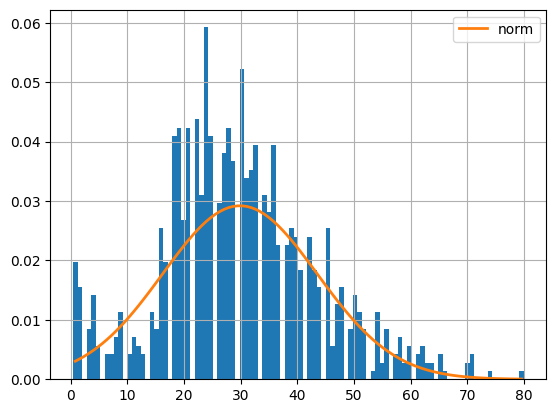

In [44]:
f_norm = Fitter(df_norm["Age"], distributions="norm" )
f_norm.fit()
f_norm.summary()

   ### З'ясуємо найкращий розподіл даних за параметром Age, використовуючи функцію fitter

Fitting 109 distributions:   3%|█▌                                                     | 3/109 [00:26<17:26,  9.87s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
Fitting 109 distributions:  71%|██████████████████████████████████████▏               | 77/109 [03:54<01:29,  2.79s/it]SKIPPED nct distribution (taking more than 30 seconds)


Fitting 109 distributions:  74%|████████████████████████████████████████▏             | 81/109 [04:05<01:32,  3.30s/it]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  91%|█████████████████████████████████████████████████     | 99/109 [05:01<00:26,  2.65s/it]C:\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED truncexpon distributi

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
laplace_asymmetric,0.037040,1049.670346,-8968.132881,inf,0.122966,3.362016e-12
dgamma,0.037252,1049.062562,-8963.047747,inf,0.091782,5.550575e-07
dweibull,0.037669,1049.290681,-8953.111354,inf,0.089400,1.202681e-06
hypsecant,0.038526,1045.768797,-8939.857161,inf,0.077134,4.668769e-05
genhyperbolic,0.038652,1035.421750,-8916.571239,inf,0.079632,2.315523e-05


C:\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


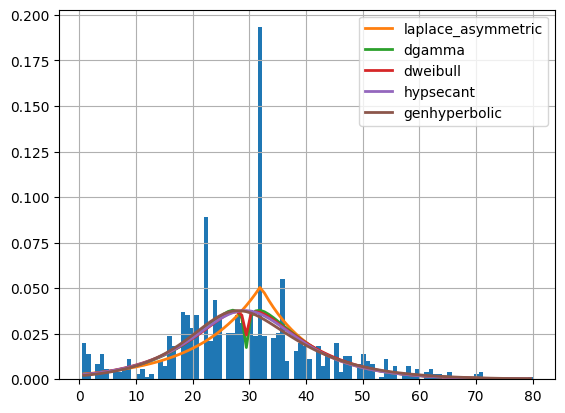

In [40]:

f_avarage = Fitter(df_avarage["Age"])
f_avarage.fit()
f_avarage.summary()

Fitting 109 distributions:  73%|███████████████████████████████████████▋              | 80/109 [01:17<00:56,  1.96s/it]SKIPPED ncx2 distribution (taking more than 30 seconds)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
Fitting 109 distributions:  84%|█████████████████████████████████████████████▌        | 92/109 [01:47<00:42,  2.52s/it]C:\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED skewnorm distribution (taking

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dweibull,0.009629,1035.034297,-10168.454072,inf,0.042777,0.074518
genhyperbolic,0.009904,1019.238392,-10129.855744,inf,0.034693,0.228475
fisk,0.010011,1014.698845,-10133.864820,inf,0.036893,0.172445
genlogistic,0.010011,1015.667348,-10133.821663,inf,0.038747,0.134175
norminvgauss,0.010059,1019.298008,-10122.776567,inf,0.041184,0.094673


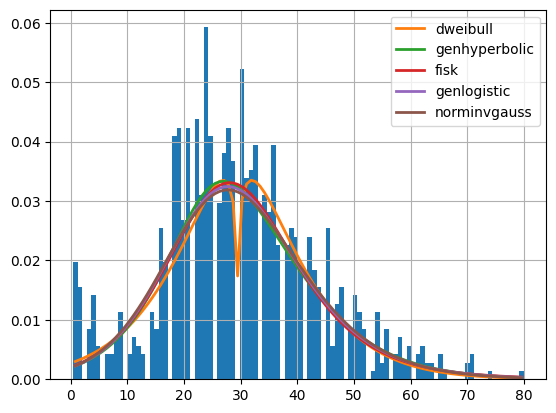

In [38]:

f_norm = Fitter(df_norm["Age"])
f_norm.fit()
f_norm.summary()

### Висновки

#### При різному заповненні відсутніх даних у датасеті ми отримуємо різні розподіли ймовірностей.
1. При першому варіанті заповнення даних, коли заміни проводилися середніми значеннями відповідних категорій ми отримали висновки що найкращі результати розподілів відповідають наступним:

    1. Ассиметричний розподіл Лапласа MSE = 0.037
    2. Гамма-розподіл MSE = 0.0372
    3. Розподіл Вейбула MSE = 0.0376
    4. Розподіл гіперболічного секансу MSE = 0.0385
    5. Узагальнений гіперболічний розподіл MSE = 0.0386
    
    
2.  При другому варіанті заповнення даних, коли заміни проводилися із застосуванням нормального розподілення випадкових величин від середніх значень відповідних категорій ми отримали висновки що найкращі результати розподілів відповідають наступним: 

    1. Розподіл Вейбула  MSE = 0.0096
    2. Розподіл гіперболічного секансу MSE = 0.0099
    3. Лог логістичний розподіл Фіска  MSE = 0.01
    4. Узагальнений логістичний розподіл MSE = 0.01
    5. Нормально-обернений розподіл Гаусса MSE = 0.01
    
В цілому, другий варант заповнення даних показує значно меньші показники MSE і найкраще наближається до нормального розподілу. Графіки розподілу стають більш згладженими.
